In [1]:
import pickle
import numpy as np
from pathlib import Path

from src.input import Input_uc, Input_ed, Input_ed_prev
from src.output import Output_uc, Output_ed, Output_ed_prev
from src.unit_commitment import solve_uc
from src.economic_dispatch import solve_ed, solve_ed_prev

In [2]:
num_units=122
num_periods=24
num_buses=197

In [3]:
path_folder_processed_kpg193 = Path.cwd().resolve() / "data" / "input" / "processed" / "KPG193_ver1_2"
timestamp_2022 = np.load(Path.cwd().resolve() / "data" / "input" / "processed" / "timestamp_2022.npy")
time_start, time_end = np.datetime64("2022-07-02T00"), np.datetime64("2022-07-02T23")
idx_time_start, idx_time_end = np.where(timestamp_2022 == time_start)[0][0], np.where(timestamp_2022 == time_end)[0][0]

In [4]:
solar_p_max = np.load(path_folder_processed_kpg193 / "solar_p_max_2022.npy")[idx_time_start-1:idx_time_end+1].sum(axis=1)
solar_p_min = np.zeros(num_periods + 1)
wind_p = np.load(path_folder_processed_kpg193 / "wind_p_2022.npy")[idx_time_start-1:idx_time_end+1].sum(axis=1)
hydro_p = np.load(path_folder_processed_kpg193 / "hydro_p_2022.npy")[idx_time_start-1:idx_time_end+1].sum(axis=1)

load = np.load(path_folder_processed_kpg193 / "demand_2022.npy")[idx_time_start-1:idx_time_end+1]
system_reserve_up = np.zeros(num_periods + 1)
system_reserve_down = np.zeros(num_periods + 1)

p_min =  np.load(path_folder_processed_kpg193 / "p_min.npy")
p_max =  np.load(path_folder_processed_kpg193 / "p_max.npy")
ramp_up =  np.load(path_folder_processed_kpg193 / "ramp_up.npy")
ramp_down =  np.load(path_folder_processed_kpg193 / "ramp_down.npy")
startup_ramp =  np.load(path_folder_processed_kpg193 / "startup_ramp.npy")
shutdown_ramp =  np.load(path_folder_processed_kpg193 / "shutdown_ramp.npy")
min_up =  np.load(path_folder_processed_kpg193 / "min_up.npy")
min_down =  np.load(path_folder_processed_kpg193 / "min_down.npy")
cost_quad =  np.load(path_folder_processed_kpg193 / "cost_quad.npy")
cost_lin =  np.load(path_folder_processed_kpg193 / "cost_lin.npy")
cost_const =  np.load(path_folder_processed_kpg193 / "cost_const.npy")

In [5]:
cost_startup_step = pickle.load(open(path_folder_processed_kpg193 / "cost_startup_step.pkl", "rb"))
num_cooling_steps = np.array([len(csc_i) for csc_i in cost_startup_step])

u_prev = [
    np.load(path_folder_processed_kpg193 / "status_2022.npy")
    [idx_time_start-num_cooling_steps.max():idx_time_start]
    [:, idx_unit][-lookup:].tolist()
    for idx_unit, lookup in enumerate(num_cooling_steps)
]

In [6]:
mustoff_2022 = np.load(path_folder_processed_kpg193 / "mustoff_2022.npy")
mustoff_2022 = mustoff_2022[
    (mustoff_2022[:, 2] >= idx_time_start) & (mustoff_2022[:, 1] <= idx_time_end)
]
mustoff = []
for unit, start, end in mustoff_2022.tolist():
    start_clipped = max(start, idx_time_start)
    end_clipped = min(end, idx_time_end)
    for t in range(start_clipped, end_clipped + 1):
        mustoff.append((unit, t - int(idx_time_start)))

In [7]:
# p_prev = solve_ed_prev(
#     input_ed_prev=Input_ed_prev(
#         # meta
#         num_units=num_units,
#         num_buses=num_buses,
#         voll=3500*1300,
#         let_blackout=False,
#         curtail_penalty=0,
#         let_curtail=False,
#         exact_reserve=False,
#         # renewable
#         solar_p_max=solar_p_max[0],
#         solar_p_min=solar_p_min[0],
#         wind_p=wind_p[0],
#         hydro_p=hydro_p[0],
#         # system
#         load=load[0],
#         system_reserve_up=system_reserve_up[0],
#         system_reserve_down=system_reserve_down[0],
#         # u_prev
#         u_prev=[u[-1] for u in u_prev],
#         # operational
#         p_min=p_min, p_max=p_max, cost_quad=cost_quad, cost_lin=cost_lin, cost_const=cost_const,
#     ), 
#     output_ed_prev=Output_ed_prev(), 
#     only_p_prev=True,
# )

In [8]:
input_ed_prev=Input_ed_prev(
    # meta
    num_units=num_units,
    num_buses=num_buses,
    voll=3500*1300,
    let_blackout=False,
    curtail_penalty=0,
    let_curtail=False,
    exact_reserve=False,
    # renewable
    solar_p_max=solar_p_max[0],
    solar_p_min=solar_p_min[0],
    wind_p=wind_p[0],
    hydro_p=hydro_p[0],
    # system
    load=load[0],
    system_reserve_up=system_reserve_up[0],
    system_reserve_down=system_reserve_down[0],
    # u_prev
    u_prev=[u[-1] for u in u_prev],
    # operational
    p_min=p_min, p_max=p_max, cost_quad=cost_quad, cost_lin=cost_lin, cost_const=cost_const,
)
output_ed_prev = Output_ed_prev()
solve_ed_prev(input_ed_prev=input_ed_prev, output_ed_prev=output_ed_prev, only_p_prev=False)
p_prev = output_ed_prev.p

Set parameter Username
Set parameter LicenseID to value 2659802
Academic license - for non-commercial use only - expires 2026-05-01


In [9]:
solar_p_max = solar_p_max[1:]
solar_p_min = solar_p_min[1:]
wind_p = wind_p[1:]
hydro_p = hydro_p[1:]
load = load[1:]
system_reserve_up = system_reserve_up[1:]
system_reserve_down = system_reserve_down[1:]

---
---
---

In [10]:
input_uc = Input_uc(
    # meta
    num_units=num_units,
    num_periods=num_periods,
    num_buses=num_buses,
    voll=3500*1300,
    let_blackout=False,
    curtail_penalty=0,
    let_curtail=False,
    exact_reserve=False,
    # renewable
    solar_p_max=solar_p_max,
    solar_p_min=solar_p_min,
    wind_p=wind_p,
    hydro_p=hydro_p,
    # system
    load=load,
    system_reserve_up=system_reserve_up,
    system_reserve_down=system_reserve_down,
    # operational constraint
    p_min=p_min,
    p_max=p_max,
    ramp_up=ramp_up,
    ramp_down=ramp_down,
    startup_ramp=startup_ramp,
    shutdown_ramp=shutdown_ramp,
    min_up=min_up,
    min_down=min_down,
    # generation cost function
    cost_quad=cost_quad,
    cost_lin=cost_lin,
    cost_const=cost_const,
    # previous horizon
    p_prev=p_prev,
    u_prev=u_prev,
    # startup cost function
    cost_startup_step=cost_startup_step,
    # mustoff
    mustoff=mustoff,
)

In [11]:
np.array(input_uc.min_up_prev)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
np.array(input_uc.min_down_prev)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [14]:
unit_type = np.load(path_folder_processed_kpg193 / "unit_type.npy")

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import pandas as pd


def plot_uc_history(u_prev,
                    min_up_prev,  min_down_prev,
                    min_up,       min_down,
                    unit_type,          # len = num_units, values 0/1/2
                    idx0: int, idx1: int,
                    history_start='2022-06-29T00',
                    horizon_start='2022-07-02T00',
                    hours_history: int = 48,
                    hours_future:  int = 24):
    """Visualise past on/off status and residual MU / MD obligations."""

    # ---- 0 · coerce every scalar to vanilla Python int -----------------
    idx0, idx1          = int(idx0), int(idx1)
    hours_history       = int(hours_history)
    hours_future        = int(hours_future)
    nu                  = idx1 - idx0                          # rows
    H                   = hours_history + hours_future         # cols

    # ---- 1 · canvas ----------------------------------------------------
    Z = np.full((nu, H), -3, dtype=int)                        # -3 → blank

    # ---- 2 · fill past history ----------------------------------------
    for r, u in enumerate(range(idx0, idx1)):
        tail      = list(u_prev[u])[-hours_history:]           # at most 48
        col_start = hours_history - len(tail)
        for k, val in enumerate(tail, start=col_start):
            Z[r, k] = 1 + 10*int(unit_type[u]) if val else 0   # encode ON

    # ---- 3 · mark residual hours --------------------------------------
    for r, u in enumerate(range(idx0, idx1)):
        # binding ON hours
        mup = int(min_up_prev[u])
        if mup:
            Z[r, hours_history : hours_history+mup] = 1 + 10*int(unit_type[u])

        # binding OFF hours
        mdp = int(min_down_prev[u])
        if mdp:
            Z[r, hours_history : hours_history+mdp] = -2        # black bar

    # ---- 4 · prepare colour map ---------------------------------------
    cmap = ListedColormap([
        "white",        # -3 blank
        "lightgrey",    # 0  OFF
        "black",        # -2 locked OFF
        "green",        # 1  nuclear ON
        "blue",         # 11 coal ON
        "red",          # 21 LNG  ON
    ])
    norm = BoundaryNorm([-3, -2.5, -1.5, -0.5, 5, 15, 25], cmap.N)
    Zp   = np.select(
        [Z == 0, Z == -2, Z == 1, Z == 11, Z == 21],
        [0,     -2,      1,      11,      21], default=-3
    )

    # ---- 5 · plot ------------------------------------------------------
    fig, ax = plt.subplots(figsize=(12, max(3, 0.4*nu)))
    ax.imshow(Zp, aspect='auto', cmap=cmap, norm=norm)

    # y-axis
    ax.set_yticks(range(nu))
    ax.set_yticklabels(range(idx0, idx1))
    ax.set_ylabel("unit index")

    # x-axis labels (every 24 h)
    t0  = pd.Timestamp(history_start, tz='Asia/Seoul')
    xt  = list(range(0, H+1, 24))
    ax.set_xticks(xt)
    ax.set_xticklabels([(t0 + pd.Timedelta(hours=k)).strftime('%m-%d\n%H:%M') for k in xt])
    ax.set_xlabel("time (KST)")

    # vertical dashed lines: 07-01 23:00 & 07-02 00:00
    horizon0 = pd.Timestamp(horizon_start, tz='Asia/Seoul')
    for v in (horizon0 - pd.Timedelta(hours=1), horizon0):
        ax.axvline((v - t0).total_seconds()/3600, color='k', ls='--', lw=1.2)

    # ---- 6 · outline additional MU/MD hours (optional) ----------------
    for r, u in enumerate(range(idx0, idx1)):
        # remaining ON hours
        rem_on = max(0, int(min_up[u])   - int(min_up_prev[u]))
        if rem_on:
            ax.add_patch(plt.Rectangle(
                (hours_history + int(min_up_prev[u]), r-0.5),
                rem_on, 1, fill=False, lw=1,
                edgecolor=('green' if unit_type[u]==0 else
                           'blue'  if unit_type[u]==1 else 'red')
            ))
        # remaining OFF hours
        rem_off = max(0, int(min_down[u]) - int(min_down_prev[u]))
        if rem_off:
            ax.add_patch(plt.Rectangle(
                (hours_history + int(min_down_prev[u]), r-0.5),
                rem_off, 1, fill=False, lw=1, edgecolor='black'
            ))

    # legend
    from matplotlib.patches import Patch, Rectangle
    ax.legend(handles=[
        Patch(fc='green',  label='ON nuclear'),
        Patch(fc='blue',   label='ON coal'),
        Patch(fc='red',    label='ON LNG'),
        Patch(fc='lightgrey', label='OFF'),
        Patch(fc='black',  label='locked OFF'),
        Rectangle((0,0),1,1, fill=False, ec='k', label='remaining MU/MD')
    ], loc='upper left', bbox_to_anchor=(1,1))

    plt.tight_layout()
    plt.show()


In [45]:
np.where(unit_type == 2)

(array([  3,   7,   8,  11,  12,  13,  14,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  52,  53,
         54,  55,  69,  76,  77,  78,  84,  85,  86,  88, 100, 101, 102,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121]),)

In [22]:
for i in range(0, 10):
    print(f"unit {i:2d}  type = {unit_type[i]}")


unit  0  type = 1
unit  1  type = 1
unit  2  type = 1
unit  3  type = 2
unit  4  type = 1
unit  5  type = 1
unit  6  type = 1
unit  7  type = 2
unit  8  type = 2
unit  9  type = 1


In [65]:
np.where(np.array(input_uc.min_down_prev) != 0)[0]

array([ 35, 102, 114])

In [ ]:
for idx_unit in range(122)[114:115]:
    iu_prev = u_prev[idx_unit]
    imin_up = min_up[idx_unit]
    imin_down = min_down[idx_unit]
    print(iu_prev[-imin_up:])
    print(iu_prev[-imin_down:])
    print(input_uc.min_up_prev[idx_unit])
    print(input_uc.min_down_prev[idx_unit])

[1, 1, 0, 0]
[1, 0, 0]
0
1


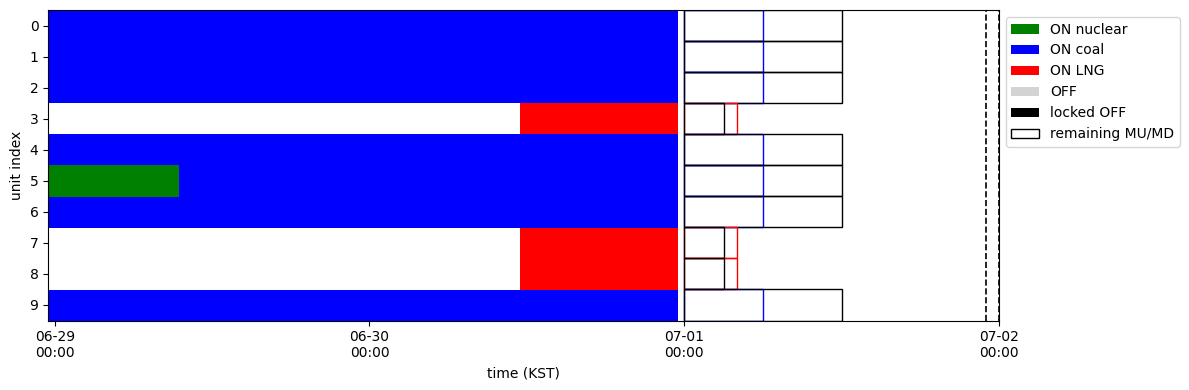

In [20]:
plot_uc_history(
    u_prev,
    input_uc.min_up_prev, input_uc.min_down_prev,
    min_up,               min_down,
    unit_type,
    0, 10,                    # show units 0-9
)
